In [1]:
import pandas as pd

In [2]:
mydata=pd.read_csv('housing.csv')

In [3]:
mydata.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
mydata.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<AxesSubplot:>

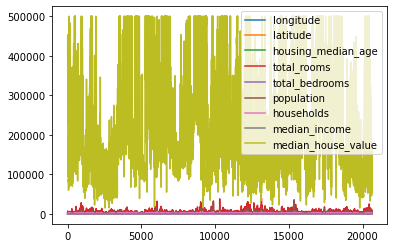

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
mydata.plot()

<AxesSubplot:ylabel='Density'>

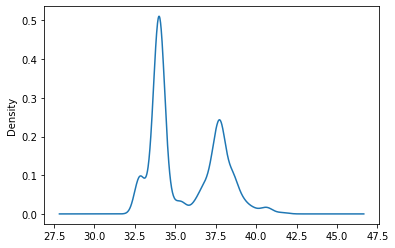

In [9]:
mydata['latitude'].plot.density()

In [10]:
mydata['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
dataset = mydata[((mydata.ocean_proximity != 'ISLAND'))]

In [12]:
dataset = pd.get_dummies(dataset,columns=['ocean_proximity'])

In [13]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


In [14]:
newdataset=dataset[['total_rooms','total_bedrooms']].div(dataset.households, axis=0) 

In [15]:
newdataset['total_rooms']

0        6.984127
1        6.238137
2        8.288136
3        5.817352
4        6.281853
           ...   
20635    5.045455
20636    6.114035
20637    5.205543
20638    5.329513
20639    5.254717
Name: total_rooms, Length: 20635, dtype: float64

In [16]:
dataset['total_rooms']=newdataset['total_rooms']

In [17]:
dataset['total_bedrooms']=newdataset['total_bedrooms']

In [18]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,6.984127,1.023810,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,6.238137,0.971880,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,8.288136,1.073446,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,5.817352,1.073059,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,6.281853,1.081081,565.0,259.0,3.8462,342200.0,0,0,1,0


In [19]:
dataset.shape

(20635, 13)

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20635 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20635 non-null  float64
 1   latitude                    20635 non-null  float64
 2   housing_median_age          20635 non-null  float64
 3   total_rooms                 20635 non-null  float64
 4   total_bedrooms              20428 non-null  float64
 5   population                  20635 non-null  float64
 6   households                  20635 non-null  float64
 7   median_income               20635 non-null  float64
 8   median_house_value          20635 non-null  float64
 9   ocean_proximity_<1H OCEAN   20635 non-null  uint8  
 10  ocean_proximity_INLAND      20635 non-null  uint8  
 11  ocean_proximity_NEAR BAY    20635 non-null  uint8  
 12  ocean_proximity_NEAR OCEAN  20635 non-null  uint8  
dtypes: float64(9), uint8(4)
memory 

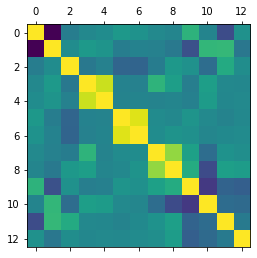

In [21]:
import matplotlib.pyplot as plt

plt.matshow(dataset.corr())
plt.show()

                            longitude  latitude  housing_median_age  \
longitude                    1.000000 -0.924676           -0.108394   
latitude                    -0.924676  1.000000            0.011462   
housing_median_age          -0.108394  0.011462            1.000000   
total_rooms                 -0.027558  0.106431           -0.153422   
total_bedrooms               0.013269  0.070277           -0.078228   
population                   0.099881 -0.108978           -0.296172   
households                   0.055400 -0.071199           -0.302863   
median_income               -0.015090 -0.079977           -0.118949   
median_house_value          -0.046208 -0.143837            0.105272   
ocean_proximity_<1H OCEAN    0.321297 -0.447303            0.045551   
ocean_proximity_INLAND      -0.055480  0.351058           -0.236537   
ocean_proximity_NEAR BAY    -0.474465  0.358735            0.255333   
ocean_proximity_NEAR OCEAN   0.045568 -0.160942            0.021729   

     

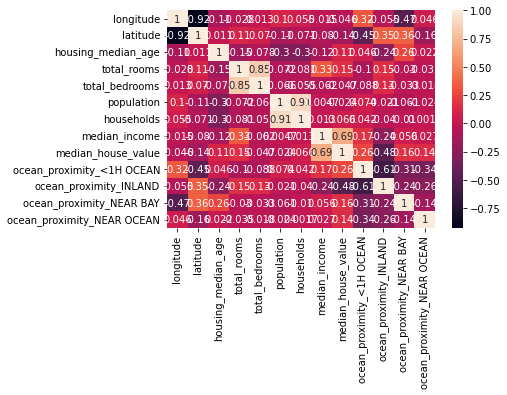

In [22]:
# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb

# import file with data

# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(dataset.corr())

# plotting correlation heatmap
dataplot = sb.heatmap(dataset.corr(), annot=True)

# displaying heatmap
mp.show()


In [23]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman',random_state=0)
X=imp.fit_transform(dataset)

[IterativeImputer] Completing matrix with shape (20635, 13)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.21
[IterativeImputer] Change: 0.9430704833270753, scaled tolerance: 500.00100000000003 
[IterativeImputer] Early stopping criterion reached.


In [24]:
X

array([[-122.23,   37.88,   41.  , ...,    0.  ,    1.  ,    0.  ],
       [-122.22,   37.86,   21.  , ...,    0.  ,    1.  ,    0.  ],
       [-122.24,   37.85,   52.  , ...,    0.  ,    1.  ,    0.  ],
       ...,
       [-121.22,   39.43,   17.  , ...,    1.  ,    0.  ,    0.  ],
       [-121.32,   39.43,   18.  , ...,    1.  ,    0.  ,    0.  ],
       [-121.24,   39.37,   16.  , ...,    1.  ,    0.  ,    0.  ]])

In [25]:
datasetfill=pd.DataFrame(X, columns = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value','ocean_proximity_<1H OCEAN','ocean_proximity_INLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN'])

In [26]:
datasetfill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20635 entries, 0 to 20634
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20635 non-null  float64
 1   latitude                    20635 non-null  float64
 2   housing_median_age          20635 non-null  float64
 3   total_rooms                 20635 non-null  float64
 4   total_bedrooms              20635 non-null  float64
 5   population                  20635 non-null  float64
 6   households                  20635 non-null  float64
 7   median_income               20635 non-null  float64
 8   median_house_value          20635 non-null  float64
 9   ocean_proximity_<1H OCEAN   20635 non-null  float64
 10  ocean_proximity_INLAND      20635 non-null  float64
 11  ocean_proximity_NEAR BAY    20635 non-null  float64
 12  ocean_proximity_NEAR OCEAN  20635 non-null  float64
dtypes: float64(13)
memory usage: 2.

In [27]:
datasetfill

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,6.984127,1.023810,322.0,126.0,8.3252,452600.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,6.238137,0.971880,2401.0,1138.0,8.3014,358500.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,8.288136,1.073446,496.0,177.0,7.2574,352100.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,5.817352,1.073059,558.0,219.0,5.6431,341300.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,6.281853,1.081081,565.0,259.0,3.8462,342200.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20630,-121.09,39.48,25.0,5.045455,1.133333,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0
20631,-121.21,39.49,18.0,6.114035,1.315789,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0
20632,-121.22,39.43,17.0,5.205543,1.120092,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0
20633,-121.32,39.43,18.0,5.329513,1.171920,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0


In [28]:
df = pd.DataFrame(datasetfill)
  
print("Original DataFrame:")
display(df)
  
# shift column 'C' to first position
target_column = df.pop('median_house_value')
  
# insert column using insert(position,column_name,first_column) function
df.insert(12, 'median_house_value', target_column)
  
print()
print("Final DataFrame")
display(df)

Original DataFrame:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,6.984127,1.023810,322.0,126.0,8.3252,452600.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,6.238137,0.971880,2401.0,1138.0,8.3014,358500.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,8.288136,1.073446,496.0,177.0,7.2574,352100.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,5.817352,1.073059,558.0,219.0,5.6431,341300.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,6.281853,1.081081,565.0,259.0,3.8462,342200.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20630,-121.09,39.48,25.0,5.045455,1.133333,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0
20631,-121.21,39.49,18.0,6.114035,1.315789,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0
20632,-121.22,39.43,17.0,5.205543,1.120092,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0
20633,-121.32,39.43,18.0,5.329513,1.171920,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0



Final DataFrame


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,-122.23,37.88,41.0,6.984127,1.023810,322.0,126.0,8.3252,0.0,0.0,1.0,0.0,452600.0
1,-122.22,37.86,21.0,6.238137,0.971880,2401.0,1138.0,8.3014,0.0,0.0,1.0,0.0,358500.0
2,-122.24,37.85,52.0,8.288136,1.073446,496.0,177.0,7.2574,0.0,0.0,1.0,0.0,352100.0
3,-122.25,37.85,52.0,5.817352,1.073059,558.0,219.0,5.6431,0.0,0.0,1.0,0.0,341300.0
4,-122.25,37.85,52.0,6.281853,1.081081,565.0,259.0,3.8462,0.0,0.0,1.0,0.0,342200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20630,-121.09,39.48,25.0,5.045455,1.133333,845.0,330.0,1.5603,0.0,1.0,0.0,0.0,78100.0
20631,-121.21,39.49,18.0,6.114035,1.315789,356.0,114.0,2.5568,0.0,1.0,0.0,0.0,77100.0
20632,-121.22,39.43,17.0,5.205543,1.120092,1007.0,433.0,1.7000,0.0,1.0,0.0,0.0,92300.0
20633,-121.32,39.43,18.0,5.329513,1.171920,741.0,349.0,1.8672,0.0,1.0,0.0,0.0,84700.0


In [75]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,-122.23,37.88,41.0,6.984127,1.023810,322.0,126.0,8.3252,0.0,0.0,1.0,0.0,452600.0
1,-122.22,37.86,21.0,6.238137,0.971880,2401.0,1138.0,8.3014,0.0,0.0,1.0,0.0,358500.0
2,-122.24,37.85,52.0,8.288136,1.073446,496.0,177.0,7.2574,0.0,0.0,1.0,0.0,352100.0
3,-122.25,37.85,52.0,5.817352,1.073059,558.0,219.0,5.6431,0.0,0.0,1.0,0.0,341300.0
4,-122.25,37.85,52.0,6.281853,1.081081,565.0,259.0,3.8462,0.0,0.0,1.0,0.0,342200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20630,-121.09,39.48,25.0,5.045455,1.133333,845.0,330.0,1.5603,0.0,1.0,0.0,0.0,78100.0
20631,-121.21,39.49,18.0,6.114035,1.315789,356.0,114.0,2.5568,0.0,1.0,0.0,0.0,77100.0
20632,-121.22,39.43,17.0,5.205543,1.120092,1007.0,433.0,1.7000,0.0,1.0,0.0,0.0,92300.0
20633,-121.32,39.43,18.0,5.329513,1.171920,741.0,349.0,1.8672,0.0,1.0,0.0,0.0,84700.0


In [32]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and Y data
regressor.fit(x_train,y_train)


DecisionTreeRegressor(random_state=0)

In [76]:
import pandas as pd
import numpy as np
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [88]:
x_data=pd.DataFrame(df).drop(['median_house_value'],axis=1)
y_data=pd.DataFrame(df)['median_house_value']


In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error

from sklearn import set_config 

In [79]:
x_train,x_valid, y_train,y_valid = train_test_split(
    x_data,y_data, test_size=0.2, random_state=42, shuffle=True)

In [80]:
x_train=scale(x_train)
y_train=scale(y_train)

In [81]:
x_valid

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
1266,-121.67,37.99,22.0,6.378049,1.189024,527.0,164.0,4.3750,0.0,1.0,0.0,0.0
8081,-118.19,33.81,21.0,4.778646,1.111979,1038.0,384.0,4.4559,0.0,0.0,0.0,1.0
13014,-121.22,38.68,10.0,5.356715,1.093242,2954.0,1169.0,3.4506,0.0,1.0,0.0,0.0
10091,-117.94,33.93,34.0,5.034130,1.088737,698.0,293.0,3.8194,1.0,0.0,0.0,0.0
2493,-120.19,36.61,29.0,4.593168,1.049689,1408.0,322.0,2.2930,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1718,-122.34,37.99,42.0,4.061008,0.864721,1271.0,377.0,2.6167,0.0,0.0,1.0,0.0
1709,-122.32,37.95,36.0,5.962343,1.025105,573.0,239.0,4.3500,0.0,0.0,1.0,0.0
3876,-118.51,34.22,36.0,5.919492,1.108051,1334.0,472.0,4.3462,1.0,0.0,0.0,0.0
3537,-118.52,34.26,21.0,4.471956,1.080849,4717.0,1979.0,3.7816,1.0,0.0,0.0,0.0


In [82]:
regr = RandomForestRegressor(max_depth=3, random_state=0)

In [83]:
regr.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [84]:
y_pred=regr.predict(x_valid)

In [85]:
y_pred

array([2.26696448, 2.26696448, 2.26696448, ..., 2.26696448, 2.26696448,
       2.11461087])

In [86]:
mse=mean_squared_error(y_valid,y_pred)

In [87]:
rmse=np.sqrt(mse)
rmse

234653.56439648228

In [89]:
# Importing the libraries
import numpy as np # for array operations
import pandas as pd # for working with DataFrames
import requests, io # for HTTP requests and I/O commands
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline

# scikit-learn modules
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model

In [90]:
x_train,x_valid, y_train,y_valid = train_test_split(
    x_data,y_data, test_size=0.2, random_state=42, shuffle=True)

In [92]:
##Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(n_estimators = 10, random_state = 0)

# Fitting the Random Forest Regression model to the data
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [93]:
# Predicting the target values of the test set
y_pred = model.predict(x_valid)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_valid, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  52160.404


In [96]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [97]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [99]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [100]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [101]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 50, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}  



In [103]:
randmf = RandomForestRegressor(n_estimators = 50, min_samples_split = 6, min_samples_leaf= 1, max_features = 'sqrt', max_depth= 100, bootstrap=False) 
randmf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=6, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [105]:
y_pred_rf1 = pd.DataFrame( { "actual": y_valid, 
"predicted_prob": randmf.predict( 
( x_valid ) ) } ) 
y_pred_rf1

,actual,predicted_prob
8570,500001.0,400278.452333
1712,161000.0,169529.300000
15912,258600.0,281419.066667
5194,98900.0,101188.266667
13579,71500.0,71649.266667
...,...,...
8468,184500.0,167024.400000
2144,72300.0,71983.266667
3665,151500.0,188265.466667
7109,188700.0,196206.900000


In [106]:
# Predicting the target values of the test set
y_pred = randmf.predict(x_valid)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_valid, y_pred)), '.3f'))
print("\nRMSE: ", rmse)


RMSE:  48971.271
